# Lab 1: The Apollo Missions
## Peter Micciche

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.constants import G
import matplotlib

In [2]:
## Define constants
Me = 5.9E24    # mass of earth
Mm = 7.3E22
d_em = 6E8     # distance earth to moon
RE = 6378      # km radius of Earth
RM = 1737      # km radius of Moon

# Part 1

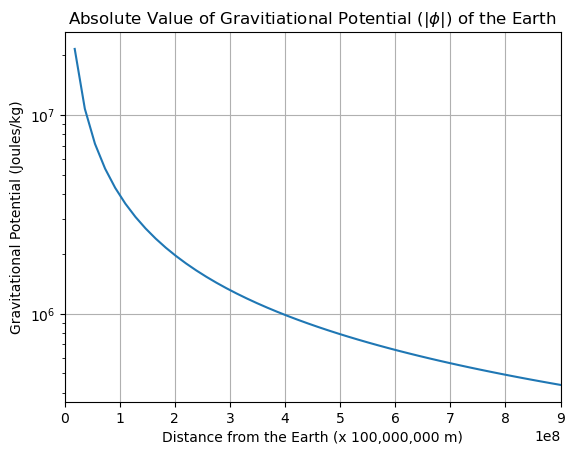

In [3]:
# 1
def potential(xM, yM, x, y, M):
    if np.isclose(x,xM) and np.isclose(y,yM):
        r = np.nan
    else:
        r = np.sqrt((x-xM)**2 + (y-yM)**2)
    return -G*M/r

x = np.linspace(0,1.5*d_em)

potential_vectorized = np.vectorize(potential)

fig1, ax1 = plt.subplots()
ax1.plot(x,np.abs(potential_vectorized(xM=0,yM=0,y=0,M=Me,x=x)))
ax1.set_xbound(0,1.5*d_em)
ax1.set_yscale('log')
ax1.set_xscale('linear')
ax1.grid(True)
ax1.set_xlabel('Distance from the Earth (x 100,000,000 m)')
ax1.set_ylabel('Gravitational Potential (Joules/kg)')
ax1.set_title(r'Absolute Value of Gravitiational Potential (|$\phi$|) of the Earth');
plt.savefig('GpotEarth.png');

In [4]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

nx = 500
ny = 500
x1 = np.linspace(-1.5*d_em,1.5*d_em,nx)
y1 = np.linspace(-1.5*d_em,1.5*d_em,ny)
xgrid, ygrid = np.meshgrid(x1,y1)
pot = np.zeros_like(xgrid)

for col in range(len(y1)):
    for row in range(len(x1)):
        pot[col,row] += potential(0,0,xgrid[col,row],ygrid[col,row],Me)



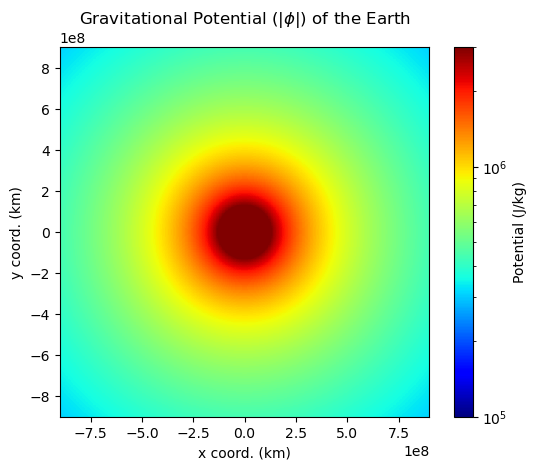

In [5]:
fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(xgrid,ygrid,-(pot), norm= mcolors.LogNorm(vmin=1E5,vmax=3E6),cmap=cm.jet)
ax.set_xbound(-1.5*d_em,1.5*d_em)
ax.set_ybound(-1.5*d_em,1.5*d_em)
ax.set_xlabel('x coord. (km)')
ax.set_ylabel('y coord. (km)')
ax.set_title(r'Gravitational Potential (|$\phi$|) of the Earth')
ax.set_aspect('equal')
cbar = fig.colorbar(mesh, label='Potential (J/kg)')

# Part 2

In [6]:
for col in range(len(y1)):
    for row in range(len(x1)):
        pot[col,row] += potential_vectorized((d_em/np.sqrt(2)),(d_em/np.sqrt(2)),xgrid[col,row],ygrid[col,row],Mm)



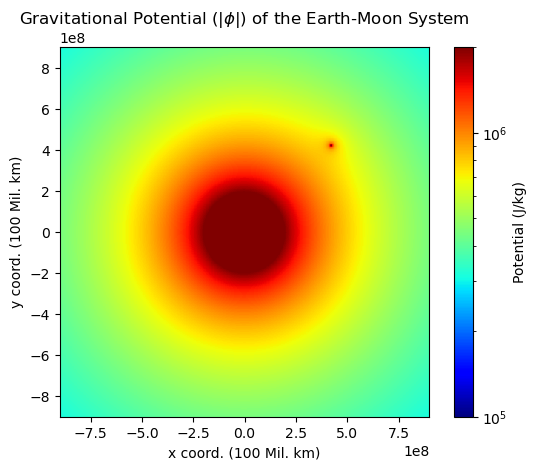

In [7]:
fig2, ax2 = plt.subplots(1,1)
mesh2 = ax2.pcolor(xgrid,ygrid,np.abs(pot), norm= mcolors.LogNorm(vmin=1E5,vmax=2E6),cmap=cm.jet)
ax2.set_xbound(-1.5*d_em,1.5*d_em)
ax2.set_ybound(-1.5*d_em,1.5*d_em)
ax2.set_xlabel('x coord. (100 Mil. km)')
ax2.set_ylabel('y coord. (100 Mil. km)')
ax2.set_title(r'Gravitational Potential (|$\phi$|) of the Earth-Moon System')
ax2.set_aspect('equal')
fig2.colorbar(mesh2,ax=ax2,label='Potential (J/kg)');

plt.savefig('GravPotEarthMoon.png');

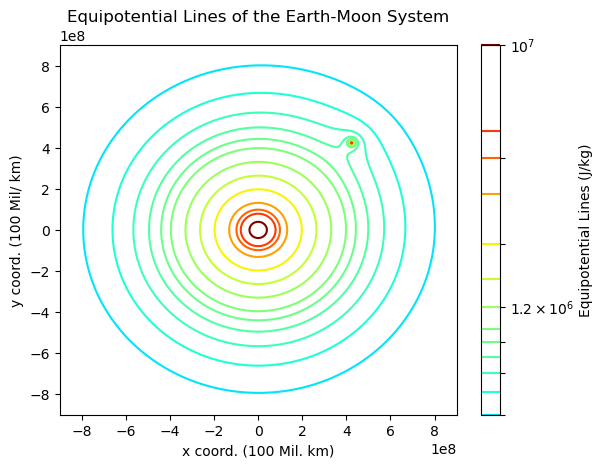

In [8]:
fig22, ax22 = plt.subplots()
cont22 = ax22.contour(xgrid,ygrid,np.abs(pot),norm=mcolors.LogNorm(vmin=1E5,vmax=1E7),levels=[5E5,6E5,7E5,8E5,9E5,1E6,1200000,1500000,2E6,3E6,4E6,5E6,1E7],cmap=cm.jet)
fig22.colorbar(cont22,ax=ax22,label='Equipotential Lines (J/kg)')
ax22.set_xlabel('x coord. (100 Mil. km)')
ax22.set_ylabel('y coord. (100 Mil/ km)')
ax22.set_title('Equipotential Lines of the Earth-Moon System');

# Part 3 #

In [9]:
# 1

def Fg21(M1,m2,x1,y1,x2,y2):
    if np.isclose(x1,x2) and np.isclose(y1,y2):
        Fgx = np.nan
        Fgy = np.nan
    else:
        vec_r21 = np.array([x2-x1,y2-y1])
        norm21 = np.linalg.norm(vec_r21)
        vec_r21_hat = vec_r21/norm21
        Fgx = (-G*M1*m2/((norm21)**2)) * vec_r21_hat[0]  # x component
        Fgy = (-G*M1*m2/((norm21)**2)) * vec_r21_hat[1]  # y component
    return Fgx, Fgy


In [10]:
# 2

Mcm = 5500

# building containers
xgrid3,ygrid3 = np.meshgrid(x1,y1)
Fcmx = np.zeros((ny,nx))
Fcmy = np.zeros((ny,nx))


# filling containers

    # run for earth = M1
for col in range(len(y1)):
    for row in range(len(x1)):
        FgxE, FgyE = Fg21(Me,Mcm,0,0,xgrid3[col,row],ygrid3[col,row])

        #update container
        Fcmx[col,row] += FgxE
        Fcmy[col,row] += FgyE
        
    # run for moon = M1
for col in range(len(y1)):
    for row in range(len(x1)):
        FgxM, FgyM = Fg21(Mm,Mcm,(d_em/np.sqrt(2)),(d_em/np.sqrt(2)),xgrid3[col,row],ygrid3[col,row])
        Fcmx[col,row] += FgxM
        Fcmy[col,row] += FgyM



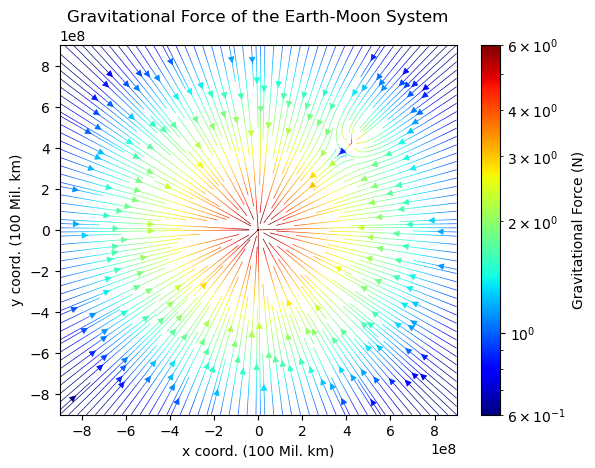

In [11]:
# create plot
fig3, ax3 = plt.subplots()
colors = np.log(np.hypot(Fcmx,Fcmy))
norm = mcolors.LogNorm(vmin=.6,vmax=6)
stream3 = ax3.streamplot(xgrid3,ygrid3,Fcmx,Fcmy, density = 3, linewidth=.5,color=colors, cmap=cm.jet, norm=norm)
cbar = fig3.colorbar(stream3.lines,label='Gravitational Force (N)')
ax3.set_title('Gravitational Force of the Earth-Moon System')
ax3.set_xlabel('x coord. (100 Mil. km)')
ax3.set_ylabel('y coord. (100 Mil. km)');

# NOTE: the below code was run to create the graph used in my report with size-enlarged Earth and Moon + labels

# diskE = plt.Circle((0, 0), 10000*RE, color='black')
# diskM = plt.Circle(((d_em/np.sqrt(2)), (d_em/np.sqrt(2))), 10000*RM, color='gray')
# ax3.add_patch(diskE)
# ax3.add_patch(diskM)
# ax3.text(0,1.3E8,"Earth",horizontalalignment='center',backgroundcolor='white')
# ax3.text((d_em/np.sqrt(2))+1.2E8,(d_em/np.sqrt(2) + 1E8),'Moon',horizontalalignment='center')
# plt.savefig('GravEarthMoonAnnotated.png');

# Part 4

In [12]:
# inputting data values
m = 1.3E4    # kg/s
m0 = 2.8E6   # kg
mf = 7.5E5   # kg
ve = 2.4E3   # m/s
gE = 9.8     # m/s/s

In [13]:
T = (m0 - mf)/m
print(f"The total burn time T will be {T:.1f} seconds")

The total burn time T will be 157.7 seconds


In [14]:
def deltaV(t,minit,mfin,mrate,vex,g):
    mt = minit - mrate*t
    dv = vex*np.log(minit/mt) - g*t
    return dv

In [15]:
from scipy.integrate import quad

In [16]:
h, err = quad(deltaV,0,T,args=(m0,mf,m,ve,gE))
print(f"Altitude at Burnout will be {h:.1f} meters or {h/1000:.1f} km")

Altitude at Burnout will be 74218.3 meters or 74.2 km
